In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('salaries.csv')

In [86]:
df.employee_residence.unique()

array(['GB', 'CA', 'US', 'IN', 'AU', 'ES', 'PT', 'DE', 'NG', 'CZ', 'CR',
       'TR', 'CL', 'PR', 'FI', 'FR', 'TH', 'BR', 'NL', 'GR', 'DK', 'BO',
       'PH', 'AX', 'DO', 'AR', 'BE', 'AT', 'SG', 'EG', 'ID', 'IT', 'AE',
       'IE', 'SI', 'MY', 'JP', 'EE', 'PK', 'PL', 'HN', 'TN', 'CH', 'RU',
       'DZ', 'VN', 'IQ', 'UA', 'BG', 'HU', 'MX', 'JE', 'RS', 'KE', 'CO',
       'NZ', 'IR', 'RO', 'CN', 'HK', 'MD', 'LU', 'HR', 'MT'], dtype=object)

In [87]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [88]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1195.000000,1.195000e+03,1195.000000,1195.000000
mean,2021.684519,2.495210e+05,122041.142259,66.736402
std,0.584604,1.136720e+06,66487.800833,44.035085
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,8.000000e+04,73961.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.755500e+05,160237.500000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [89]:
df = df.loc[df['employee_residence'] == "PT"]

In [90]:
encodingPipeline = Pipeline([  # Define the pipeline
    ('oneHotEnc', fe_OneHotEncoder(top_categories=None, variables=["experience_level", "employment_type", "salary_currency", "company_size"], drop_last=True)),
    ('countEncoder', CountFrequencyEncoder(encoding_method='count', variables=["job_title", "employee_residence", "company_location"]))
])

encodingPipeline.fit(df)  # Fit the pipeline
df = encodingPipeline.transform(df)  # Save imputed data to original X_train

In [91]:
df.head()

,work_year,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_SE,experience_level_EN,salary_currency_EUR,company_size_M,company_size_L
86,2022,2,70000,73961,12,0,9,1,0,1,1,0
87,2022,2,40000,42263,12,0,9,1,0,1,1,0
113,2022,1,66000,69734,12,100,9,1,0,1,0,1
219,2022,1,30000,31697,12,100,1,0,1,1,1,0
374,2022,1,28500,30112,12,50,9,1,0,1,0,0


In [92]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)

labels = k_means.predict(df)

<AxesSubplot: >

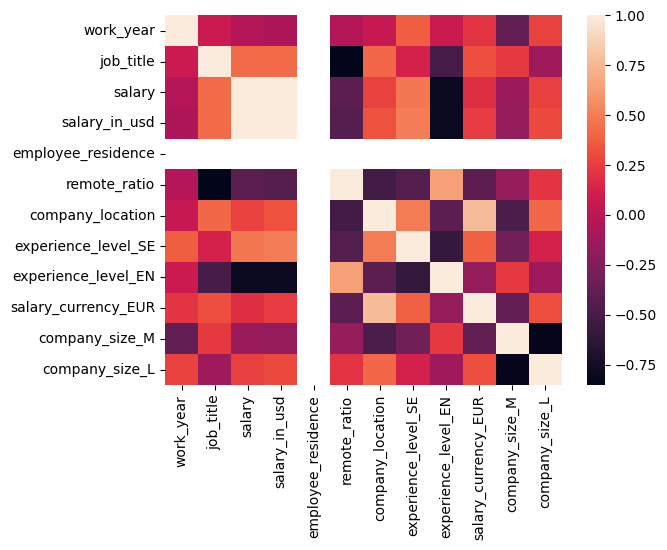

In [93]:
sns.heatmap(df.corr())

In [99]:
df.shape

(12, 12)

/tmp/ipykernel_1342565/2034187044.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, ax=ax)


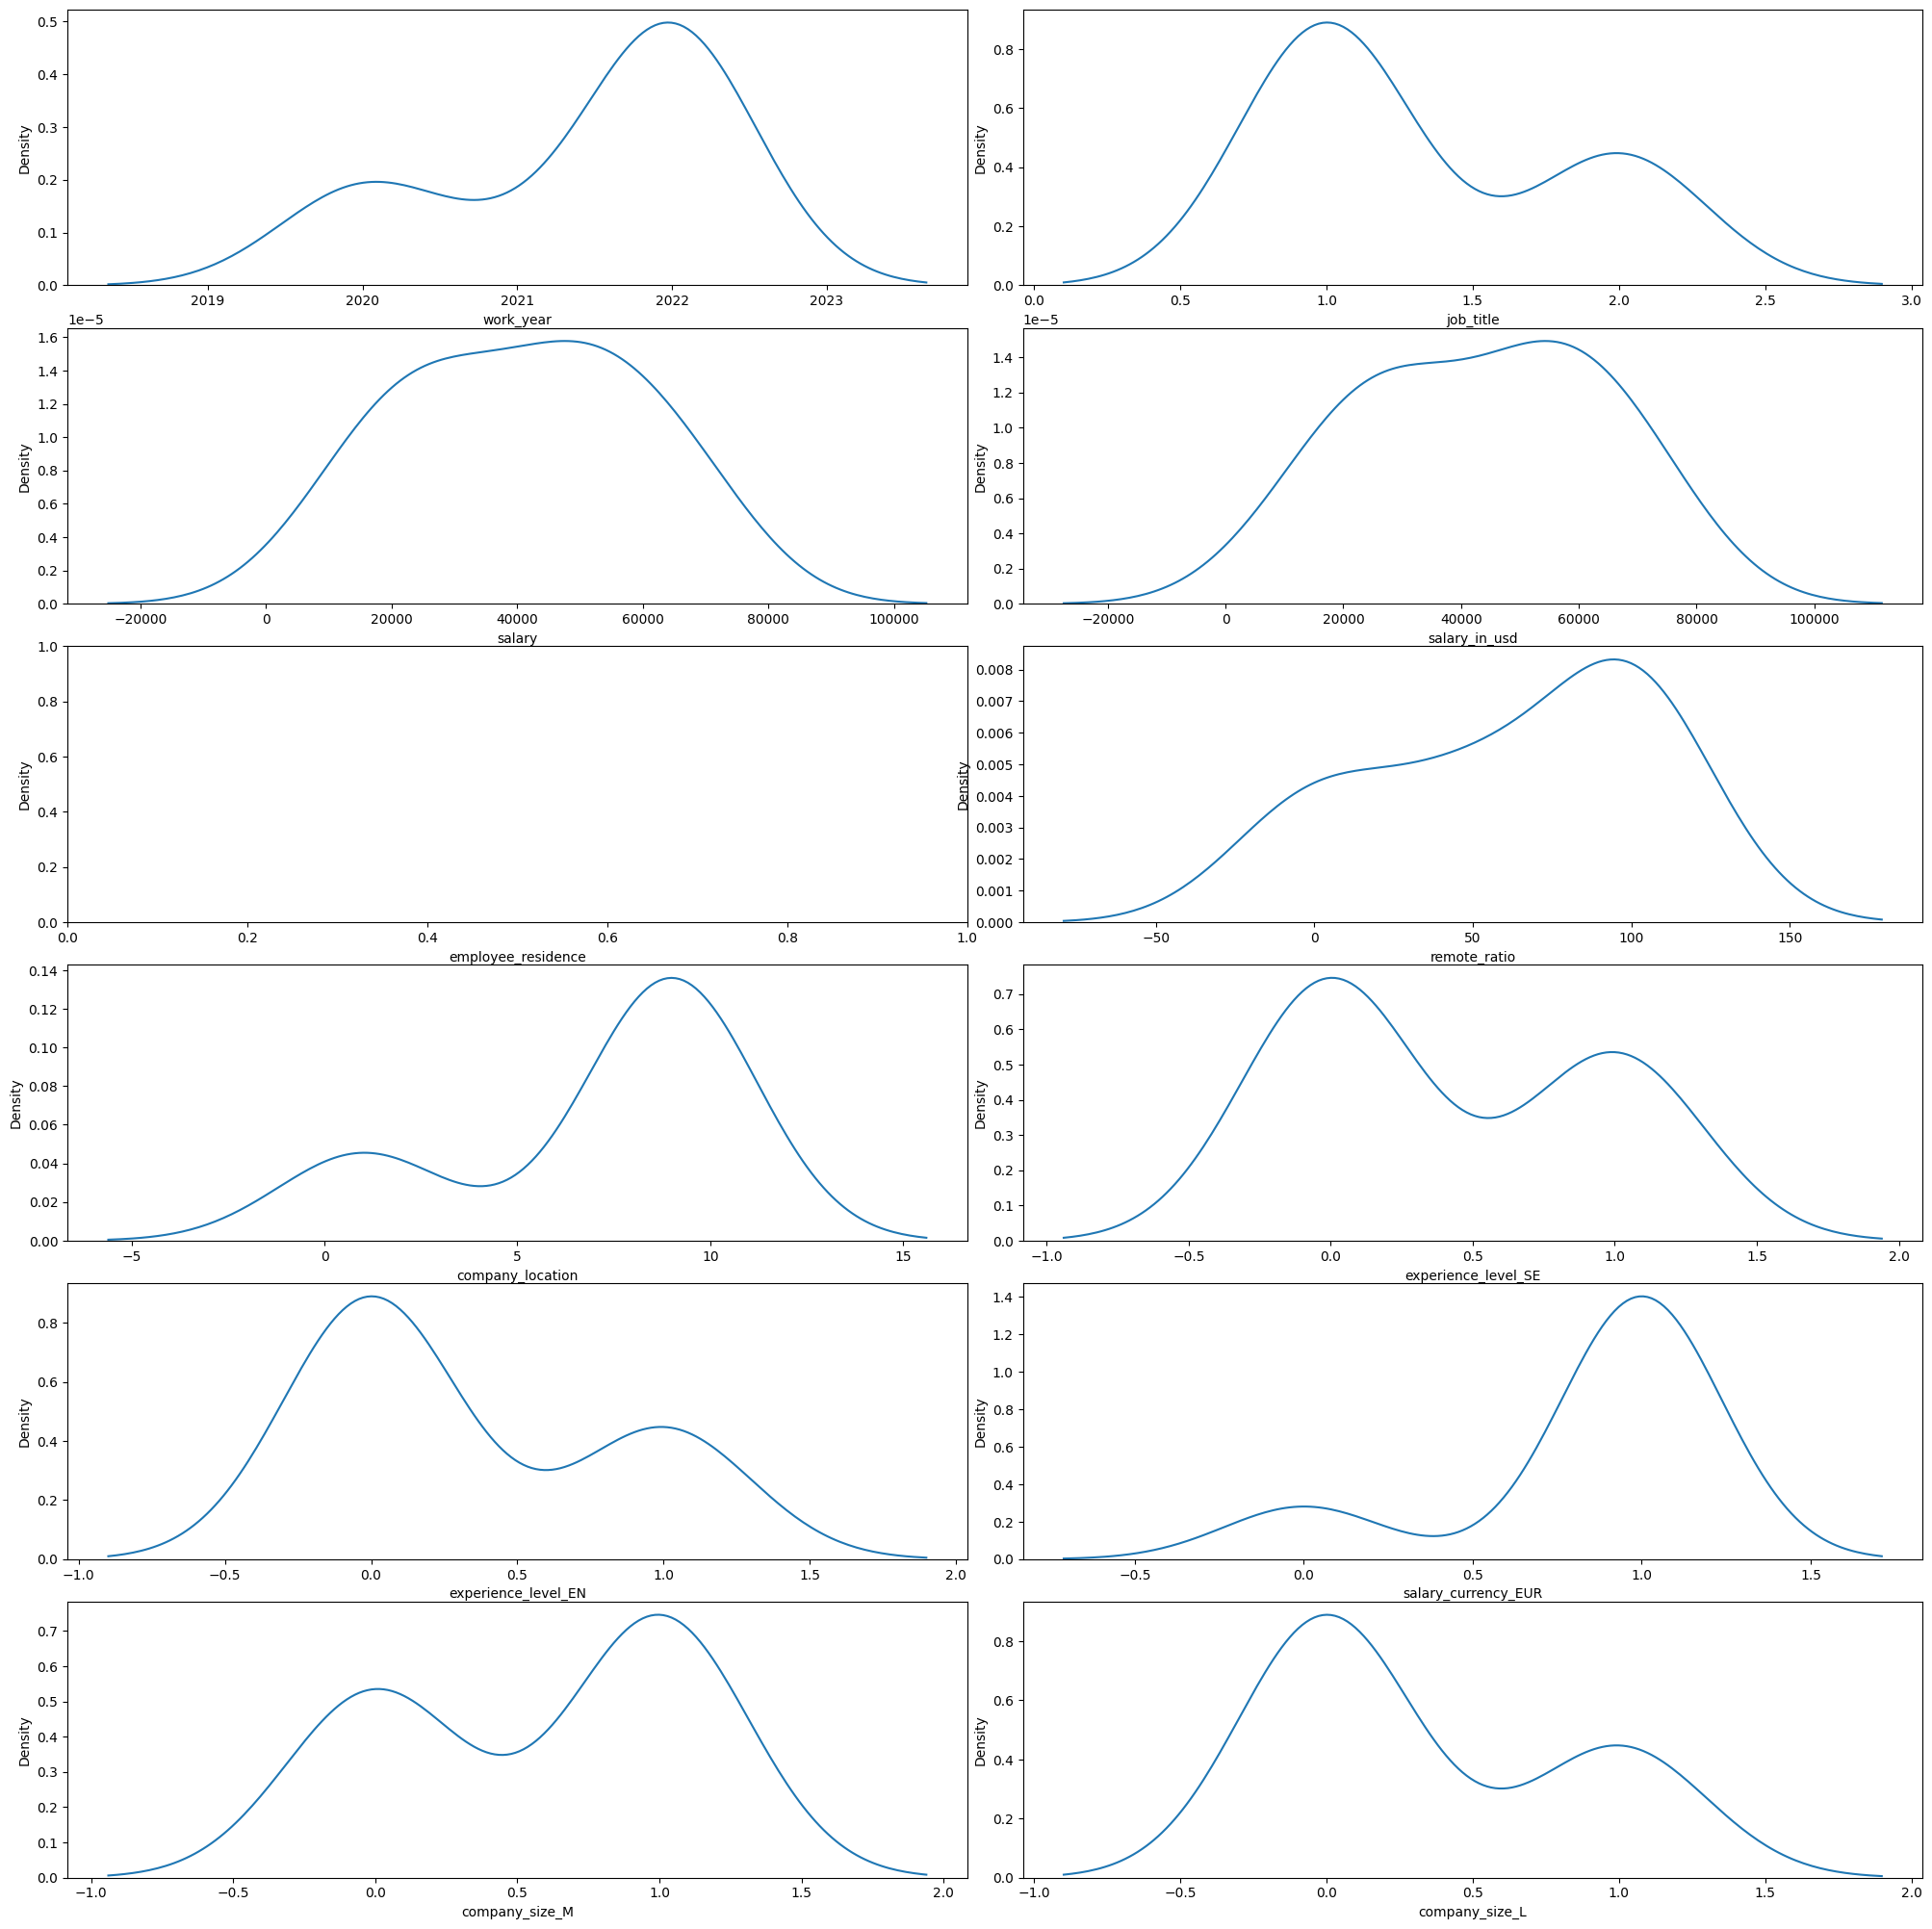

In [101]:
fig, axes = plt.subplots(6, 2, figsize=(20, 20), layout="tight")
fig.tight_layout()
cols = df.columns
for i, ax in enumerate(axes.flatten()):
    col = cols[i]
    sns.kdeplot(data=df, x=col, ax=ax)

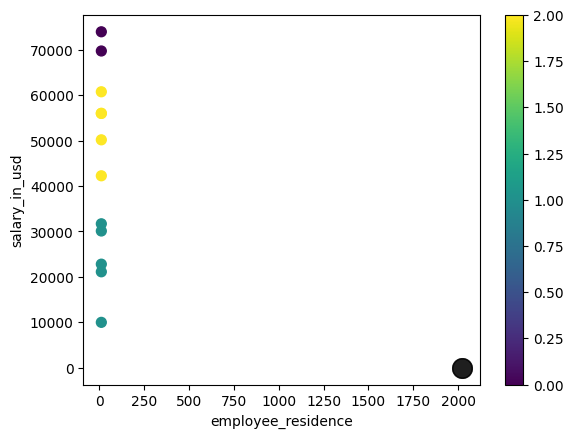

In [94]:
df.plot.scatter('employee_residence', 'salary_in_usd', c=labels, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

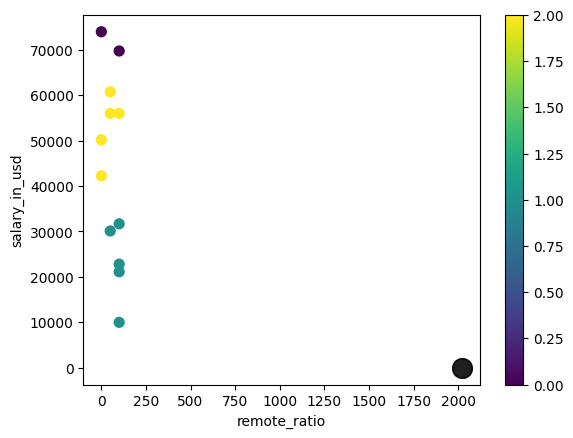

In [102]:
df.plot.scatter('remote_ratio', 'salary_in_usd', c=labels, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

df.plot.scatter('employee_residence', 'salary_in_usd', c=labels, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);